#**Subject:** Signal and Image Processing

# **Topic:** Morphological operations like dilation, erosion, opening and closing

# **Introduction:**

Morphological operations are used in image processing to modify the shape and size of objects in a binary image. The four basic morphological operations are erosion, dilation, opening, and closing. Thinning and thickening are two important morphological operations used in image processing to modify the thickness of objects in a binary image. In addition to the morphological operations of dilation, erosion, opening, and closing, hole filling and boundary extraction are also important techniques in image processing.

1. **Erosion** is a morphological operation that removes pixels at the edges of objects in a binary image. The basic idea of erosion is to use a structuring element to slide over the image and remove any pixel where the structuring element overlaps with the object in the image. This operation is useful in cases where we want to remove small objects or thin out the edges of objects.

2. **Dilation** is a morphological operation that adds pixels to the edges of objects in a binary image. The basic idea of dilation is to use a structuring element to slide over the image and add a pixel where the structuring element overlaps with the object in the image. This operation is useful in cases where we want to fill in small gaps or thicken the edges of objects.

3. **Opening** is a morphological operation that is performed by applying erosion followed by dilation on a binary image. The basic idea of opening is to remove small objects and thin out the edges of objects while preserving the overall shape of larger objects. This operation is useful in cases where we want to remove noise or small objects from an image.

4. **Closing** is a morphological operation that is performed by applying dilation followed by erosion on a binary image. The basic idea of closing is to fill in small gaps and smooth out the edges of objects while preserving the overall shape of larger objects. This operation is useful in cases where we want to fill in gaps or connect nearby objects that are separated by small gaps.

5. **Thinning** is a morphological operation that reduces the thickness of objects in a binary image while preserving their topology. The basic idea of thinning is to iteratively remove pixels from an object while preserving the connectivity and topology of the object. Thinning is useful in cases where we want to extract the centerlines of objects in an image or to separate nearby objects that are connected by thin bridges.

6. **Thickening** is a morphological operation that increases the thickness of objects in a binary image while preserving their topology. The basic idea of thickening is to replace each pixel in an object with a set of pixels that are within a certain distance of the original pixel. Thickening is useful in cases where we want to make objects in an image more robust to noise or to connect nearby objects that are separated by small gaps.

7. **Hole filling** is the process of filling in gaps or holes within an object in an image. This is useful in situations where there may be missing information in an image, or where there are small holes that need to be filled to make the image more suitable for further processing. One approach to hole filling is to use morphological algorithms, such as dilation and erosion, as demonstrated in the code example provided earlier. By using these operations in a specific order, we can fill in the holes while still preserving the overall shape and structure of the original object.

8. **Boundary extraction** is the process of identifying and extracting the boundaries of objects in an image. This is useful in situations where we want to isolate specific regions of an image for further analysis, or where we want to detect changes or differences between images. One common approach to boundary extraction is to use morphological algorithms, such as erosion and dilation, in combination with other techniques such as edge detection or contour detection. By applying these techniques, we can accurately locate the boundaries of objects in an image and extract them for further processing.

# **Erosion, Dilation, Opening, Closing**

In [ ]:
import cv2
import matplotlib.pyplot as plt

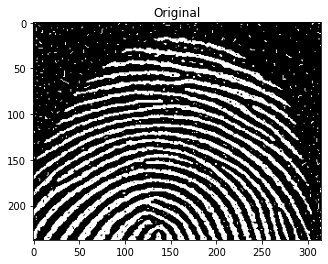

In [ ]:
img = cv2.imread("/content/Noisy Fingerprint.tif")

SE= cv2.getStructuringElement(cv2.MORPH_RECT,(3,3)) #Define the structuring element using inbuilt CV2 function

plt.imshow(img, cmap="gray")
plt.title("Original")

#Function for erosion
def erosion(img, SE):
  imgErode= cv2.erode(img,SE,1)
  plt.imshow(imgErode, cmap="gray")
  return imgErode


#Function for dilation
def dilation(img, SE):
  imgDilate= cv2.dilate(img,SE,1)
  plt.imshow(imgDilate, cmap="gray")
  return imgDilate

#Function for opening
def opening(img, SE):
  e_img = erosion(img, SE)
  imgOpening= dilation(e_img,SE)
  plt.imshow(imgOpening, cmap="gray")
  return imgOpening

#Function for closing
def closing(img, SE):
  o_img= opening(img,SE)
  imgClosing= erosion(o_img,SE)
  plt.imshow(imgClosing, cmap="gray")
  return imgClosing


Text(0.5, 1.0, 'Erosion')

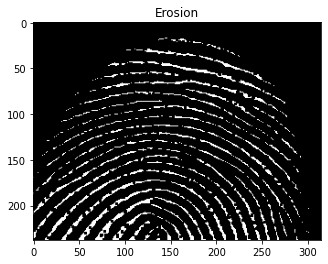

In [ ]:
a = erosion(img, SE)
plt.imshow(a)
plt.title("Erosion")

Text(0.5, 1.0, 'Dilation')

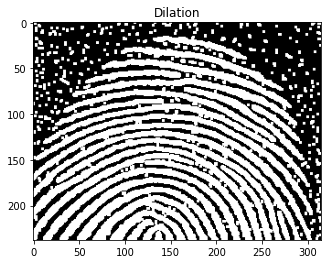

In [ ]:
b = dilation(img, SE)
plt.imshow(b)
plt.title("Dilation")

Text(0.5, 1.0, 'Opening')

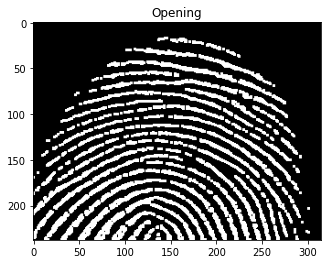

In [ ]:
c = opening(img, SE)
plt.imshow(c)
plt.title("Opening")

Text(0.5, 1.0, 'Dilation of the image')

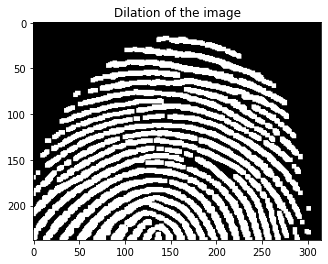

In [ ]:
#dilation of the opening
do_img = dilation(c,SE)
plt.imshow(do_img)
plt.title("Dilation of the image")

Text(0.5, 1.0, 'Closing')

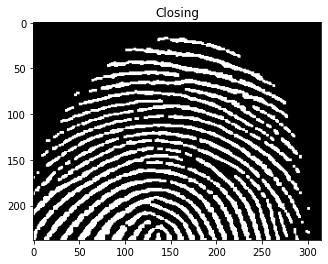

In [ ]:
d = closing(do_img, SE)
plt.imshow(d)
plt.title("Closing")

# **Thickening, Thinning**

Text(0.5, 1.0, 'Original')

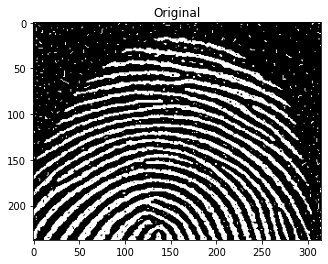

In [ ]:

img = cv2.imread('/content/Noisy Fingerprint.tif')

SE2= cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))


thickened_img = cv2.dilate(img, SE2, 1) #thickenning

thinned_img = cv2.erode(img, SE2, 1)#thinning

#orignal image
plt.imshow(img)
plt.title("Original")


Text(0.5, 1.0, 'Thickening')

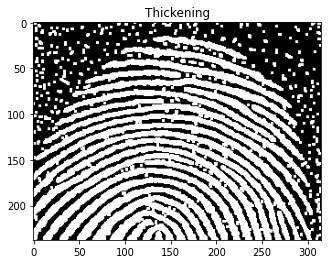

In [ ]:
plt.imshow(thickened_img)
plt.title("Thickening")

Text(0.5, 1.0, 'Thinning')

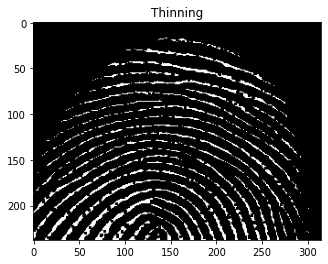

In [ ]:
plt.imshow(thinned_img)
plt.title("Thinning")

# **Boundary extraction**

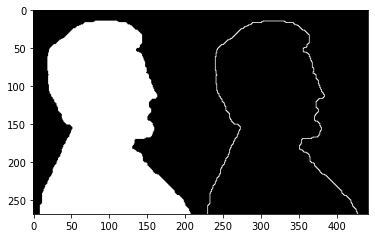

In [ ]:
import cv2
import numpy as np


img_b = cv2.imread('/content/Fig0914(a)(licoln from penny).tif')
SE3= cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
img_eroded = cv2.erode(img_b, SE)

img_boundary = img_b - img_eroded #take the diffesrnce of both images

output_img = np.concatenate((img_b, img_boundary), axis=1)#pltting both images together
plt.imshow(output_img) #boundary inverted

# **Hole filling**

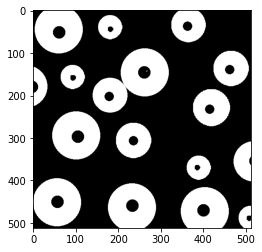

In [ ]:
img_h = cv2.imread("/content/Fig0916(a)(region-filling-reflections).tif",0)
plt.imshow(img)

(514, 514)


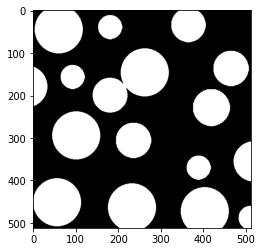

In [ ]:
mask = np.zeros((514,514), np.uint8)
print(mask.shape)
col = [0, 160, 180, 300]
row = [0, 250, 200, 240]
result = img_h.copy()
cv2.floodFill(result, mask, (row[0], col[0]), 255)
result_inv = cv2.bitwise_not(result)
saida = img_h | result_inv
plt.imshow(saida,cmap='gray')

# **Conclusion:**

In conclusion, morphological operations such as dilation, erosion, opening, and closing are fundamental image processing techniques that have a wide range of applications in various fields, including **medical imaging, computer vision, and robotics**. These operations manipulate the shape, size, and location of image features to enhance or suppress certain features in an image. These operations can be *applied iteratively, and the order of the operations can be adjusted to achieve specific effects*. While these operations are relatively simple, they can be powerful tools in image processing and are often used in conjunction with other techniques to achieve more complex tasks.

By applying these operations, researchers and engineers can **extract important information, enhance features, and remove noise from digital images**. Together, these techniques form the basis of many advanced image processing applications, including medical imaging, surveillance, and industrial automation.
